In [1]:
#!pip install librosa

# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using device: {device}")

In [2]:
#we want to somehow use the .waw files as input for the model

#compare different preprocessing methods:
#               mel spectograms
#               others
#
#Make a model that can calssify them


Importing data

In [3]:
# Import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
import pathlib
from os import listdir
import librosa
from sklearn.preprocessing import LabelEncoder
import torch as torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model



In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
#!pip install tensorflow

In [7]:
[p for p in pathlib.Path('.').iterdir() if p.is_file()]

[WindowsPath('archive.zip'),
 WindowsPath('metadataTrainwithmelgrams'),
 WindowsPath('project - kopia.ipynb')]

In [8]:

train_path = 'archive\Train_submission\Train_submission'

test_path = 'archive\Test_submission\Test_submission'

listdir("archive/Train_submission")


metadataTrain = pd.read_csv("archive/Metadata_Train.csv")
metadataTrain2 = pd.read_csv("archive/Metadata_Train.csv")

metadataTest = pd.read_csv("archive/Metadata_Test.csv")

# print(metadataTrain.head)
# print(metadataTest.head)


class_countsTrain = metadataTrain['Class'].value_counts()
num_unique_classesTrain = len(class_countsTrain)
print(class_countsTrain, num_unique_classesTrain)

class_countsTest = metadataTest['Class'].value_counts()
num_unique_classesTest = len(class_countsTest)
print(class_countsTest, num_unique_classesTest)


Class
Sound_Guitar    700
Sound_Drum      700
Sound_Violin    700
Sound_Piano     529
Name: count, dtype: int64 4
Class
Sound_Guiatr    20
Sound_Drum      20
Sound_Violin    20
Sound_Piano     20
Name: count, dtype: int64 4


In [9]:
metadataTrain = metadataTrain.loc[(metadataTrain['Class'] == 'Sound_Guitar') | (metadataTrain['Class'] == 'Sound_Piano') | (metadataTrain['Class'] == 'Sound_Drum')]

In [10]:
printus = metadataTest[metadataTest['Class'] == 'Sound_Piano']
printus

,FileName,Class
60,ROOM-room8-MUS-beethoven1.wav,Sound_Piano
61,ROOM-room8-MUS-beethoven2.wav,Sound_Piano
62,ROOM-room8-MUS-chords.wav,Sound_Piano
63,ROOM_room6_MUS_mozart_DEV_lg.wav,Sound_Piano
64,ROOM_room6_MUS_mozart_DEV_redmi.wav,Sound_Piano
65,ROOM_room6_MUS_mozart_DEV_stereomic.wav,Sound_Piano
66,ROOM_room6_MUS_pachelbel_DEV_amazon.wav,Sound_Piano
67,ROOM_room6_MUS_pachelbel_DEV_iphone.wav,Sound_Piano
68,ROOM_room6_MUS_pachelbel_DEV_lg.wav,Sound_Piano
69,ROOM_room7_MUS_beethoven1_DEV_amazon.wav,Sound_Piano


In [11]:
metadataTest = metadataTest.loc[(metadataTest['Class'] == 'Sound_Guiatr') | (metadataTest['Class'] == 'Sound_Piano') | (metadataTest['Class'] == 'Sound_Drum') ]

In [12]:
printus = metadataTest[metadataTest['Class'] == 'Sound_Drum']
printus

,FileName,Class
20,100bpm-808-like-drum-loop-74838.wav,Sound_Drum
21,darbuka-drum-percussion-64018.wav,Sound_Drum
22,hip-hop-drum-loop-22-33572.wav,Sound_Drum
23,hip-hop-drum-loop-25-33571.wav,Sound_Drum
24,kitchen-drum200616_0006_01-39711.wav,Sound_Drum
25,muvibeat3_130bpm-14333.wav,Sound_Drum
26,muvibeat4_130bpm-14334.wav,Sound_Drum
27,muvibeat5_130bpm-14335.wav,Sound_Drum
28,paft-drunk-freestyle-drum-22227.wav,Sound_Drum
29,percussion-spirit-drums-by-prettysleepy-art-13...,Sound_Drum


In [13]:
def create_mel(file, target_sr=22050):
    y, sr = librosa.load(train_path + '\\' + file, sr=None)
    resig = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

    melspectrogram = librosa.feature.melspectrogram(y=resig, sr=target_sr, n_mels=128,fmax=8000)
    

    return melspectrogram


In [14]:
metadataTrain['mel_spectrogram'] = metadataTrain['FileName'].apply(create_mel)
metadataTrain.to_csv('metadataTrainwithmelgrams', index=False)

In [15]:
metadataTrain['mel_spectrogram'][700]

array([[7.3522724e-06, 1.1889763e+00, 7.9038219e+00, ..., 6.5085161e-01,
        7.0111763e-01, 2.6283994e-01],
       [2.2653536e-05, 2.4763975e+00, 4.0258404e+01, ..., 3.2854140e-01,
        7.4975961e-01, 2.9384375e-01],
       [1.1583888e-05, 2.8443277e+00, 4.0832272e+01, ..., 2.1863845e-01,
        2.6634845e-01, 1.0022346e-01],
       ...,
       [2.5841338e-04, 7.6059446e-02, 6.0390759e-01, ..., 1.1342255e-02,
        3.9355075e-03, 2.6279527e-03],
       [1.5393792e-04, 2.3077135e-01, 1.2012197e+00, ..., 3.2260396e-02,
        6.2568076e-03, 4.8238263e-03],
       [1.5053504e-04, 1.5680610e-01, 8.6882627e-01, ..., 5.9625164e-02,
        6.6316007e-03, 6.2672906e-03]], dtype=float32)

In [16]:
def create_mel2(file, target_sr=22050):
    y, sr = librosa.load(test_path + '\\' + file, sr=None)
    resig = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

    melspectrogram = librosa.feature.melspectrogram(y=resig, sr=target_sr, n_mels=128,fmax=8000)
    

    return melspectrogram


In [17]:
metadataTest['mel_spectrogram'] = metadataTest['FileName'].apply(create_mel2)
metadataTest.to_csv('metadataTrainwithmelgrams', index=False)

In [18]:
#metadataTest['mel_spectrogram'][1]

In [19]:
# metadataTrain = pd.read_csv('metadataTrainwithmelgrams')
# metadataTest = pd.read_csv('metadataTrainwithmelgrams')

In [20]:
max_frames = 0
avg_frames = 0

for mel_spectrogram in metadataTrain['mel_spectrogram']:
    num_frames = mel_spectrogram.shape[1]
    avg_frames += num_frames
    if num_frames > max_frames:
        max_frames = num_frames

avg_frames /= len(metadataTrain['mel_spectrogram'])

chosen_frames = round((avg_frames/5)*1.5)

print(max_frames)

print(avg_frames)

print(chosen_frames)

5516
828.3141524105754
248


In [21]:
def plot_melspectrogram(melspectrogram):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('melspectrogram')
    plt.show()

index = 700


Project

In [22]:
print(metadataTrain['Class'][index])
print(metadataTrain['FileName'][index])

print(metadataTrain['mel_spectrogram'][index].shape)
print(metadataTrain['mel_spectrogram'][index+1].shape)

Sound_Drum
04-47367.wav
(128, 321)
(128, 690)


In [23]:
def mel_padder(spectrogram, chosen_frames = chosen_frames):
    num_frames = spectrogram.shape[1]
    if num_frames < chosen_frames:
        padding = np.zeros((spectrogram.shape[0], chosen_frames - num_frames))
        stack = np.concatenate((spectrogram, padding), axis=1)
        return stack 
    if num_frames > chosen_frames:
        return spectrogram[:, :chosen_frames]
    else:
        return spectrogram

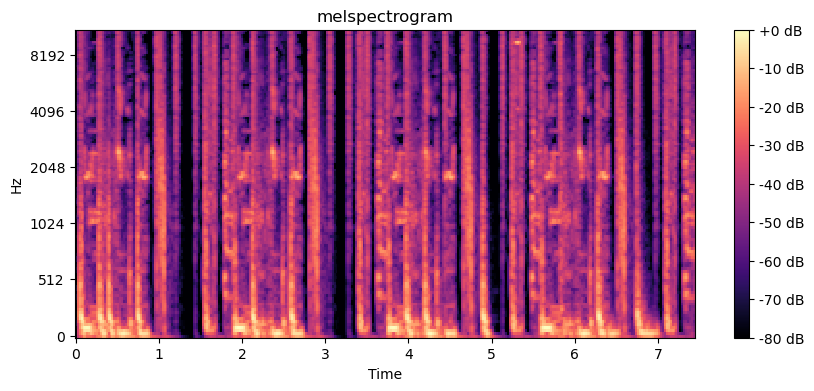

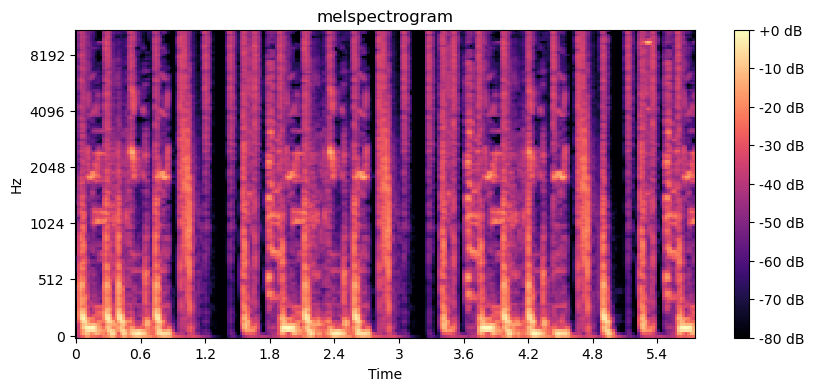

(128, 248)
(128, 321)
Sound_Drum


In [24]:
i = 700

spectogram_padded_x = mel_padder(metadataTrain['mel_spectrogram'][i], chosen_frames)

plot_melspectrogram(metadataTrain['mel_spectrogram'][i])
plot_melspectrogram(spectogram_padded_x)

print(spectogram_padded_x.shape)
print(metadataTrain['mel_spectrogram'][i].shape)
print(metadataTrain['Class'][i])

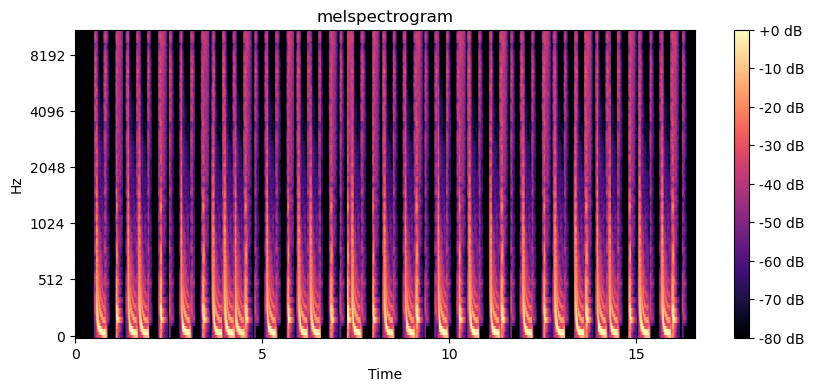

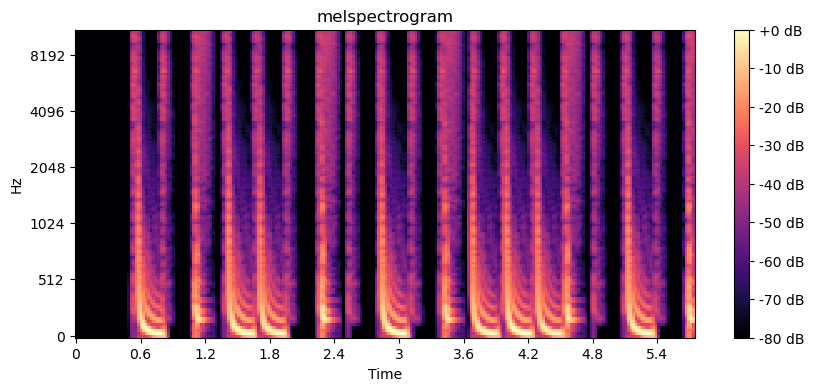

(128, 248)
(128, 714)
Sound_Drum


In [25]:
i = 800

spectogram_padded_x = mel_padder(metadataTrain['mel_spectrogram'][i], chosen_frames)

plot_melspectrogram(metadataTrain['mel_spectrogram'][i])
plot_melspectrogram(spectogram_padded_x)

print(spectogram_padded_x.shape)
print(metadataTrain['mel_spectrogram'][i].shape)
print(metadataTrain['Class'][i])

In [26]:
spectogram_paddedTrain = metadataTrain['mel_spectrogram'].apply(lambda x: mel_padder(x, chosen_frames))
x_train = np.stack(spectogram_paddedTrain)
y_train = metadataTrain['Class']

#print(spectogram_paddedTrain[543].shape)
#print(x_train.shape)

In [27]:
spectogram_paddedTest = metadataTest['mel_spectrogram'].apply(lambda x: mel_padder(x, chosen_frames))
x_test = np.stack(spectogram_paddedTest)
y_test = metadataTest['Class']

print(spectogram_paddedTest[1].shape)
print(x_test.shape)

(128, 248)
(60, 128, 248)


In [28]:
x_train_expanded = np.expand_dims(x_train, axis=-1)

# One-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=3)

# Normalize
x_train_normalized = (x_train_expanded - np.mean(x_train_expanded)) / np.std(x_train_expanded)

# Split the data into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_normalized, y_train_one_hot, test_size=0.2, random_state=42)

In [29]:
x_train_split.shape

(1543, 128, 248, 1)

In [30]:
y_train_split.shape

(1543, 3)

In [31]:
x_test_expanded = np.expand_dims(x_test, axis=-1)

# One-hot encoding
# label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_split = tf.keras.utils.to_categorical(y_test_encoded, num_classes=3)

# Normalize
x_test_split = (x_test_expanded - np.mean(x_test_expanded)) / np.std(x_test_expanded)

In [32]:
y_train_split

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [33]:
y_train_encoded

array([1, 1, 1, ..., 2, 2, 2])

In [34]:
# Create a DataFrame to store one-hot encodings for each original label
data = {'Original Label': label_encoder.inverse_transform(y_train_encoded),
        'One-hot Encodings': [list(encoding) for encoding in y_train_one_hot]}
df = pd.DataFrame(data)

grouped_df = df.groupby('Original Label')['One-hot Encodings'].apply(list).reset_index()

# Print the DataFrame
print(grouped_df)

  Original Label                                  One-hot Encodings
0     Sound_Drum  [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...
1   Sound_Guiatr  [[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, ...
2    Sound_Piano  [[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...


In [35]:
#y_train_encoded

In [36]:
from tensorflow.keras.layers import LeakyReLU

modelLeaky = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, chosen_frames, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

custom_learning_rate = 0.001

modelLeaky.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=custom_learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

modelLeaky.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 246, 32)      320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 126, 246, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 123, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 121, 64)       18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 61, 121, 64)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 60, 64)        0         
 g2D)                                                   

In [37]:
# Train the model
epochs = 10
batch_size = 32
history = modelLeaky.fit(x_train_split, y_train_split, validation_data=(x_val_split, y_val_split),
                    epochs=epochs, batch_size=batch_size, shuffle=True)


Epoch 1/10
49/49 [==============================] - 35s 707ms/step - loss: 0.7013 - accuracy: 0.7673 - val_loss: 0.5159 - val_accuracy: 0.9326
Epoch 2/10
49/49 [==============================] - 34s 689ms/step - loss: 0.3193 - accuracy: 0.8976 - val_loss: 0.8004 - val_accuracy: 0.9326
Epoch 3/10
49/49 [==============================] - 34s 687ms/step - loss: 0.3777 - accuracy: 0.9404 - val_loss: 0.4644 - val_accuracy: 0.9301
Epoch 4/10
49/49 [==============================] - 34s 688ms/step - loss: 0.2309 - accuracy: 0.9553 - val_loss: 0.3862 - val_accuracy: 0.9430
Epoch 5/10
49/49 [==============================] - 34s 689ms/step - loss: 0.1844 - accuracy: 0.9682 - val_loss: 0.3630 - val_accuracy: 0.9482
Epoch 6/10
49/49 [==============================] - 34s 689ms/step - loss: 0.1251 - accuracy: 0.9721 - val_loss: 0.5897 - val_accuracy: 0.9482
Epoch 7/10
49/49 [==============================] - 35s 707ms/step - loss: 0.2016 - accuracy: 0.9747 - val_loss: 0.5418 - val_accuracy: 0.9560

In [38]:
modelLeaky_save_path = "modelLeaky.h5"
modelLeaky.save(modelLeaky_save_path)
print("Model saved to", modelLeaky_save_path)

c:\Users\ernil\anaconda3\envs\dml\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to modelLeaky.h5


In [39]:
# # Load the model from the saved file
# modelImproved = load_model("modelImproved.h5")

# # Now you can use 'loaded_model' to make predictions

In [40]:
# Evaluate model on test data
test_loss, test_accuracy = modelLeaky.evaluate(x_test_split, y_test_split)
print(f"Test accuracy: {test_accuracy}")

2/2 [==============================] - 0s 145ms/step - loss: 1.9122 - accuracy: 0.7000
Test accuracy: 0.699999988079071


In [41]:
for i in range(10): #range(len(x_test_split)):
    # Print input data for each test sample
    #print(f"Input for test sample {i}:", x_test_split[i])
    
    # Print the ground truth labels for each test sample
    print(f"Ground Truth for test sample {i}:", y_test_split[i])
    
    # Obtain the model's prediction for the test sample
    prediction = modelLeaky.predict(x_test_split[i].reshape(1, 128, chosen_frames, 1))
    print(f"Prediction for test sample {i}:", prediction)

Ground Truth for test sample 0: [0. 1. 0.]


1/1 [==============================] - 0s 127ms/step
Prediction for test sample 0: [[9.9994779e-01 2.1622008e-12 5.2183746e-05]]
Ground Truth for test sample 1: [0. 1. 0.]
1/1 [==============================] - 0s 40ms/step
Prediction for test sample 1: [[0.5267259  0.46534997 0.00792417]]
Ground Truth for test sample 2: [0. 1. 0.]
1/1 [==============================] - 0s 30ms/step
Prediction for test sample 2: [[2.6187274e-04 1.5430900e-05 9.9972266e-01]]
Ground Truth for test sample 3: [0. 1. 0.]
1/1 [==============================] - 0s 30ms/step
Prediction for test sample 3: [[0.00734953 0.98036134 0.01228916]]
Ground Truth for test sample 4: [0. 1. 0.]
1/1 [==============================] - 0s 30ms/step
Prediction for test sample 4: [[9.7090721e-01 3.5591237e-04 2.8736861e-02]]
Ground Truth for test sample 5: [0. 1. 0.]
1/1 [==============================] - 0s 38ms/step
Prediction for test sample 5: [[1.6478561e-12 9.9949658e-01 5.0342025e-04]]
Ground Truth for test sample 6: [0

2/2 [==============================] - 0s 137ms/step


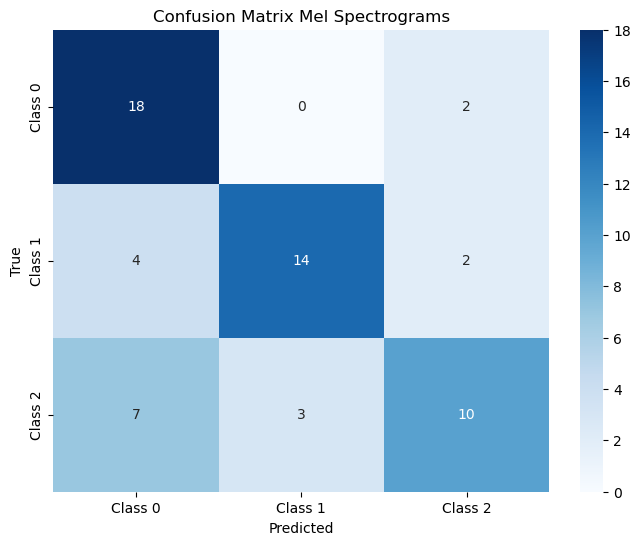

              precision    recall  f1-score   support

           0       0.62      0.90      0.73        20
           1       0.82      0.70      0.76        20
           2       0.71      0.50      0.59        20

    accuracy                           0.70        60
   macro avg       0.72      0.70      0.69        60
weighted avg       0.72      0.70      0.69        60



In [73]:
# Test the model on the test data
predictions = modelLeaky.predict(x_test_split)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_split, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Mel Spectrograms')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels))

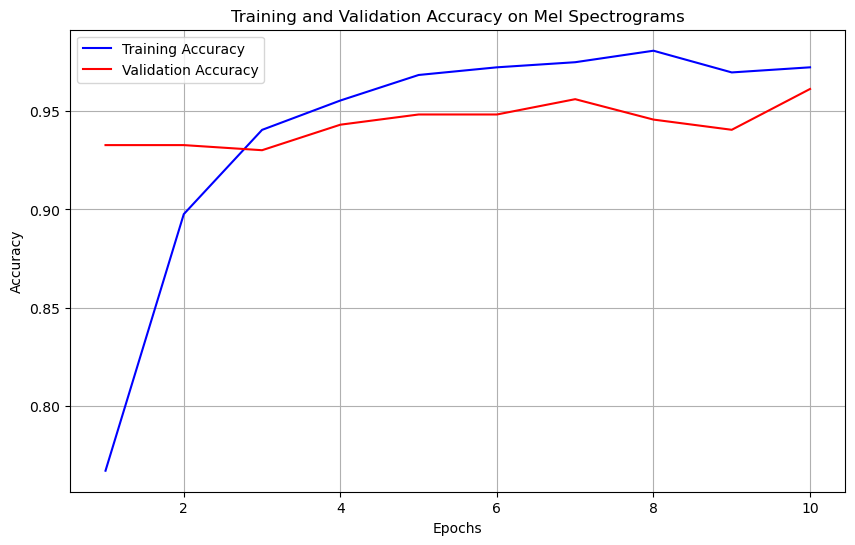

In [43]:
# Get the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy on Mel Spectrograms')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
#########################################################

In [46]:
def create_spectrogram(file, target_sr=22050):
    # Load the audio file
    y, sr = librosa.load(train_path + '\\' + file, sr=None)
    resig = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

    # Compute the Short-Time Fourier Transform with reduced n_fft and hop_length
    spectrogram = np.abs(librosa.stft(resig, n_fft=256, hop_length=64))

    return spectrogram

In [47]:
def create_spectrogram2(file, target_sr=22050):
    # Load the audio file
    y, sr = librosa.load(test_path + '\\' + file, sr=None)
    resig = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

    # Compute the Short-Time Fourier Transform with reduced n_fft and hop_length
    spectrogram = np.abs(librosa.stft(resig, n_fft=256, hop_length=64))

    return spectrogram

In [48]:
metadataTrain['normal_spectrogram'] = metadataTrain['FileName'].apply(create_spectrogram)


In [49]:
metadataTrain['Class'][700]

'Sound_Drum'

In [50]:
print(metadataTrain['normal_spectrogram'][700].shape)
print(metadataTrain['FileName'][700])
print(metadataTrain['Class'][700])

(129, 2564)
04-47367.wav
Sound_Drum


In [51]:
spectrogramN1 = metadataTrain['normal_spectrogram'][700]

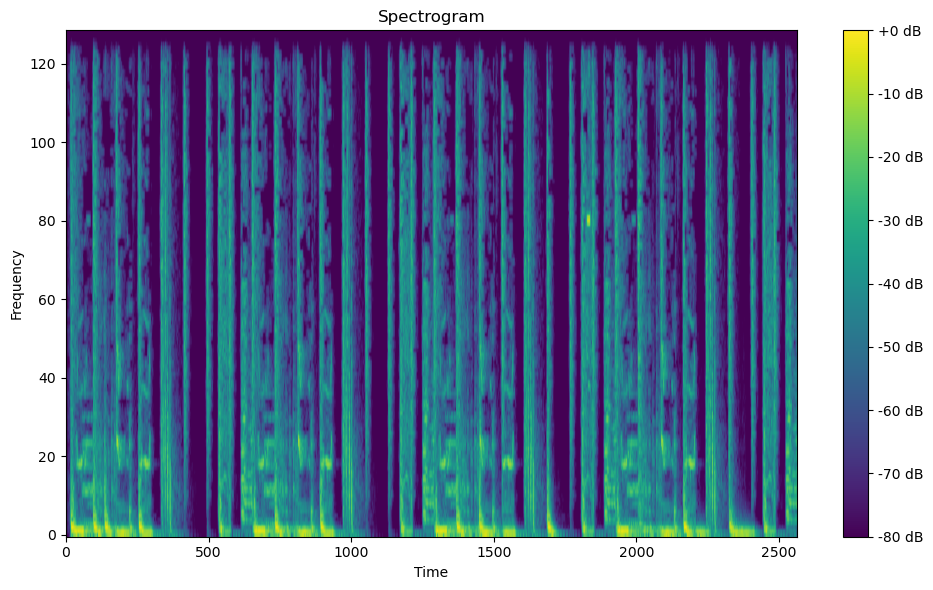

In [52]:
def plot_spectrogram(spectrogram, title='Spectrogram', xlabel='Time', ylabel='Frequency'):
    plt.figure(figsize=(10, 6))
    plt.imshow(librosa.amplitude_to_db(spectrogram, ref=np.max), aspect='auto', origin='lower')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

plot_spectrogram(spectrogramN1, title='Spectrogram')

In [53]:
def pad_or_clip_spectrogram(spectrogram, desired_length):

    # Get the current length of the spectrogram
    current_length = spectrogram.shape[1]

    if current_length == desired_length:
        # If the current length matches the desired length no change
        return spectrogram
    elif current_length < desired_length:
        # Pad the spectrogram
        pad_width = desired_length - current_length
        padded_spectrogram = np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant')
        return padded_spectrogram
    else:
        # Clip the spectrogram
        clipped_spectrogram = spectrogram[:, :desired_length]
        return clipped_spectrogram

In [54]:
spectogram_paddedTrain_Normal = metadataTrain['normal_spectrogram'].apply(lambda x: pad_or_clip_spectrogram(x, (round(chosen_frames))))
x_train_Normal = np.stack(spectogram_paddedTrain_Normal)
y_train_Normal = metadataTrain['Class']

print(spectogram_paddedTrain_Normal[7].shape)
print(x_train_Normal.shape)

(129, 248)
(1929, 129, 248)


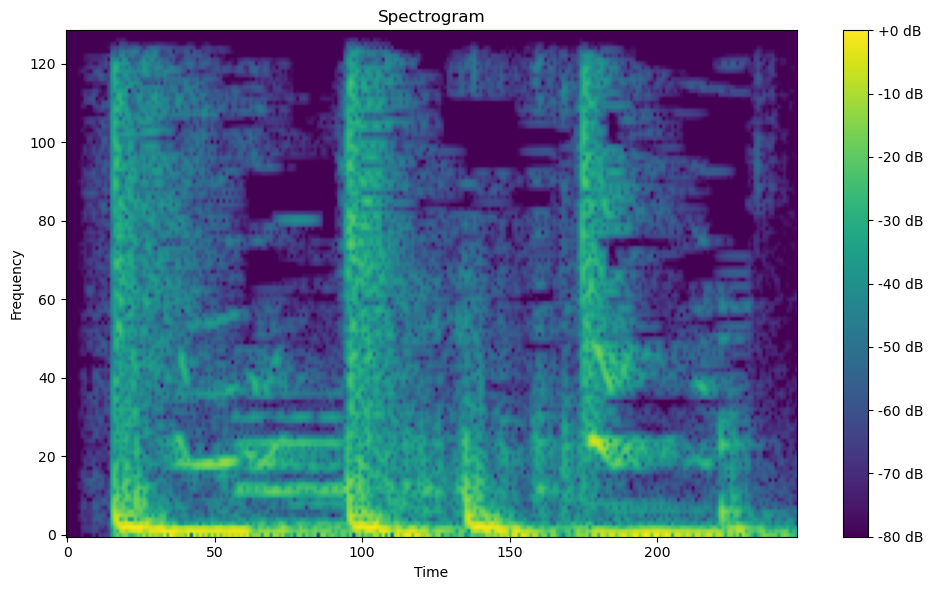

In [55]:
plot_spectrogram(x_train_Normal[700], title='Spectrogram')

In [56]:
metadataTest['normal_spectrogram'] = metadataTest['FileName'].apply(create_spectrogram2)

In [57]:
metadataTest['normal_spectrogram'][20].shape

(129, 6640)

In [58]:
spectogram_paddedtest_Normal = metadataTest['normal_spectrogram'].apply(lambda x: pad_or_clip_spectrogram(x, round(chosen_frames)))
x_test_Normal = np.stack(spectogram_paddedtest_Normal)
y_test_Normal = metadataTest['Class']

print(spectogram_paddedtest_Normal[20].shape)
print(x_test_Normal.shape)

(129, 248)
(60, 129, 248)


In [59]:
x_train_Normal_expanded = np.expand_dims(x_train_Normal, axis=-1)

# One-hot encoding
label_encoder = LabelEncoder()
y_train_Normal_encoded = label_encoder.fit_transform(y_train_Normal)
y_train_Normal_one_hot = tf.keras.utils.to_categorical(y_train_Normal_encoded, num_classes=3)

# Normalize
x_train_Normal_normalized = (x_train_Normal_expanded - np.mean(x_train_Normal_expanded)) / np.std(x_train_Normal_expanded)

# Split the data into training and validation sets
x_train_Normal_split, x_val_Normal_split, y_train_Normal_split, y_val_Normal_split = train_test_split(
    x_train_Normal_normalized, y_train_Normal_one_hot, test_size=0.2, random_state=42)

In [60]:

# Create a LabelEncoder and fit it to your original labels
label_encoder = LabelEncoder()
y_train_Normal_encoded = label_encoder.fit_transform(y_train_Normal)

# Create a dictionary to map encoded labels to original labels
encoded_to_original_mapping = {encoded_label: original_label for encoded_label, original_label in zip(y_train_Normal_encoded, y_train_Normal)}

# Now convert the encoded labels to one-hot encoding
y_train_Normal_one_hot = tf.keras.utils.to_categorical(y_train_Normal_encoded, num_classes=3)

# Print each encoded label and its corresponding original label
for encoded_label, original_label in encoded_to_original_mapping.items():
    print(f"Encoded Label {encoded_label}: Original Label {original_label}")

Encoded Label 1: Original Label Sound_Guitar
Encoded Label 0: Original Label Sound_Drum
Encoded Label 2: Original Label Sound_Piano


In [61]:
x_train_Normal_split.shape

(1543, 129, 248, 1)

In [62]:
x_test_Normal_expanded = np.expand_dims(x_test_Normal, axis=-1)

# One-hot encoding
# label_encoder = LabelEncoder()
y_test_Normal_encoded = label_encoder.fit_transform(y_test_Normal)
y_test_Normal_split = tf.keras.utils.to_categorical(y_test_Normal_encoded, num_classes=3)

# Normalize
x_test_Normal_split = (x_test_Normal_expanded - np.mean(x_test_Normal_expanded)) / np.std(x_test_Normal_expanded)

print(metadataTest['normal_spectrogram'].shape)

(60,)


In [64]:
from tensorflow.keras.layers import LeakyReLU

In [65]:
modelLeakyNormal = Sequential([
    Conv2D(32, (3, 3), input_shape=(129, (chosen_frames), 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

custom_learning_rate = 0.001

modelLeakyNormal.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=custom_learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

modelLeakyNormal.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 127, 246, 32)      320       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 127, 246, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 123, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 121, 64)       18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 61, 121, 64)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 60, 64)        0         
 g2D)                                                 

In [66]:
# Train the model
epochs = 10
batch_size = 32
historyNormal = modelLeakyNormal.fit(x_train_Normal_split, y_train_Normal_split, validation_data=(x_val_Normal_split, y_val_Normal_split),
                    epochs=epochs, batch_size=batch_size, shuffle=True)


Epoch 1/10
49/49 [==============================] - 41s 815ms/step - loss: 0.6875 - accuracy: 0.7524 - val_loss: 0.6891 - val_accuracy: 0.8109
Epoch 2/10
49/49 [==============================] - 37s 753ms/step - loss: 0.5382 - accuracy: 0.8146 - val_loss: 0.5394 - val_accuracy: 0.8316
Epoch 3/10
49/49 [==============================] - 35s 719ms/step - loss: 0.4890 - accuracy: 0.8146 - val_loss: 0.7775 - val_accuracy: 0.7979
Epoch 4/10
49/49 [==============================] - 35s 724ms/step - loss: 0.5357 - accuracy: 0.8095 - val_loss: 0.5669 - val_accuracy: 0.8264
Epoch 5/10
49/49 [==============================] - 36s 731ms/step - loss: 0.4209 - accuracy: 0.8244 - val_loss: 0.6908 - val_accuracy: 0.8368
Epoch 6/10
49/49 [==============================] - 37s 754ms/step - loss: 0.4460 - accuracy: 0.8373 - val_loss: 0.8282 - val_accuracy: 0.8135
Epoch 7/10
49/49 [==============================] - 37s 749ms/step - loss: 0.5112 - accuracy: 0.8302 - val_loss: 0.6499 - val_accuracy: 0.8187

In [67]:
modelLeakyNormal_save_path = "modelLeakyNormal.h5"
modelLeakyNormal.save(modelLeakyNormal_save_path)
print("Model saved to", modelLeakyNormal_save_path)

c:\Users\ernil\anaconda3\envs\dml\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to modelLeakyNormal.h5


In [68]:
# # Load the model from the saved file
# modelLeakyNormal = load_model("modelLeakyNormal.h5")

# # Now you can use 'modelLeakyNormal' to make predictions

In [69]:
# Evaluate model on test data
test_lossNormal, test_accuracyNormal = modelLeakyNormal.evaluate(x_test_Normal_split, y_test_Normal_split)
print(f"Test accuracy: {test_accuracyNormal}")
for i in range(10):
    
    # Print the ground truth labels for each test sample
    print(f"Ground Truth for test sample {i}:", y_test_Normal_split[i])
    
    # Obtain the model's prediction for the test sample
    prediction = modelLeakyNormal.predict(x_test_Normal_split[i].reshape(1, 129, (chosen_frames), 1))
    print(f"Prediction for test sample {i}:", prediction)

1/2 [==============>...............] - ETA: 0s - loss: 1.0660 - accuracy: 0.8125

2/2 [==============================] - 0s 235ms/step - loss: 1.3467 - accuracy: 0.7667
Test accuracy: 0.7666666507720947
Ground Truth for test sample 0: [0. 1. 0.]
1/1 [==============================] - 0s 98ms/step
Prediction for test sample 0: [[0.01073855 0.61772335 0.37153816]]
Ground Truth for test sample 1: [0. 1. 0.]
1/1 [==============================] - 0s 46ms/step
Prediction for test sample 1: [[0.05905509 0.6955034  0.2454415 ]]
Ground Truth for test sample 2: [0. 1. 0.]
1/1 [==============================] - 0s 38ms/step
Prediction for test sample 2: [[0.01755668 0.00186241 0.9805809 ]]
Ground Truth for test sample 3: [0. 1. 0.]
1/1 [==============================] - 0s 36ms/step
Prediction for test sample 3: [[0.05905509 0.6955034  0.2454415 ]]
Ground Truth for test sample 4: [0. 1. 0.]
1/1 [==============================] - 0s 38ms/step
Prediction for test sample 4: [[0.04289621 0.1176433  0.8394605 ]]
Ground Truth for test sample 5: [0. 1. 0.]
1/1 [=====================

2/2 [==============================] - 0s 133ms/step


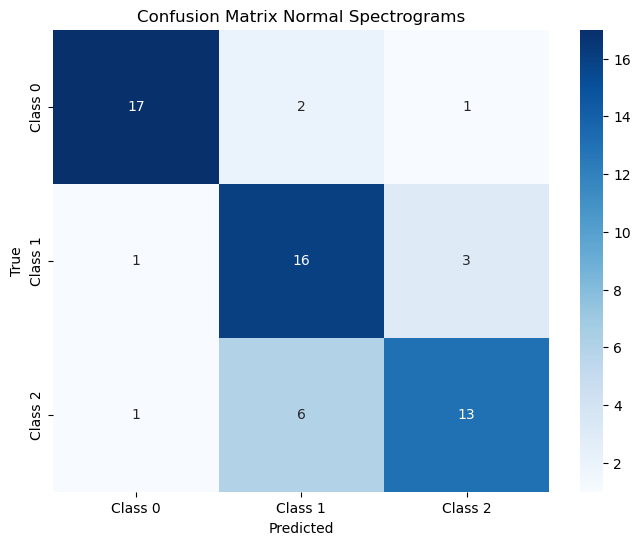

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.67      0.80      0.73        20
           2       0.76      0.65      0.70        20

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.78      0.77      0.77        60



In [74]:
# Test the model on the test data
predictions = modelLeakyNormal.predict(x_test_Normal_split)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_Normal_split, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Normal Spectrograms')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels))

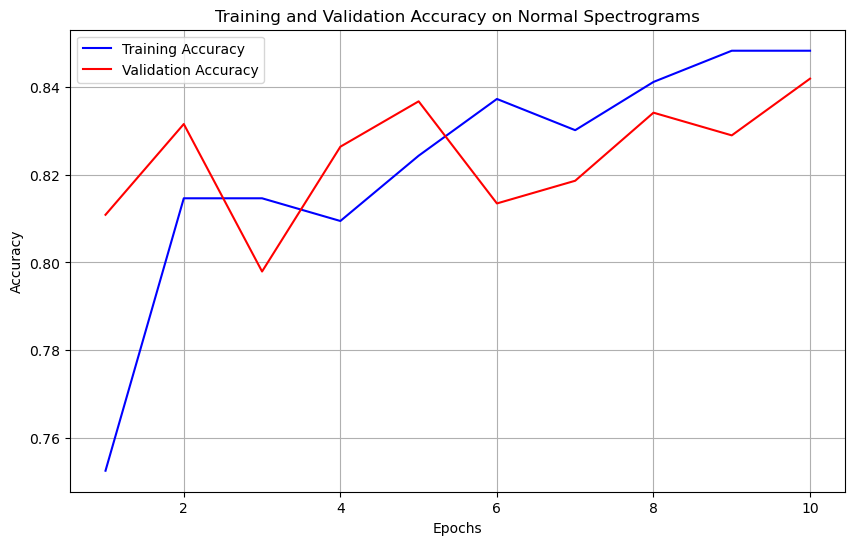

In [75]:
# Get the training history
train_accuracy = historyNormal.history['accuracy']
val_accuracy = historyNormal.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy on Normal Spectrograms')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()